In [1]:
%load_ext autoreload
%autoreload 2

In [129]:
from dac_analysis import get_df, value_counts, to_results
from dac_config import groups, scale, categories

df = get_df("data.csv", drop=False)


shorts = {
    "DAC Awareness": "Haben Sie schon von Technologien zur Entnahme von Kohlendioxid (CO2) aus der Luft (auf Englisch Direct Air Capture (DAC)) gehört?",
    "DAC Knowledge": "Wie gut sind ihre Kenntnisse dieser Technologien?",
    "Storage Awareness": "Haben Sie schon von Kohlendioxid (CO2)-Speicherung gehört?",
    "Storage Knowledge": "Wie gut sind ihre Kenntnisse der CO2-Speicherungstechnologien?",
    "Initial Storage Support": "CO2-Speicherung",
    "Final Storage Support": "CO2-Speicherung.1",
    "Initial DAC Support": "Direct Air Capture (DAC)",
    "Final DAC Support": "Direct Air Capture (DAC).1",
}

DAC_KNOWLEDGE = "Wie gut sind ihre Kenntnisse dieser Technologien?"
STORAGE_KNOWLEDGE = "Wie gut sind ihre Kenntnisse der CO2-Speicherungstechnologien?"

labels = {
    DAC_KNOWLEDGE:"Wie gut sind ihre Kenntnisse von Technologien\n zur Entnahme von Kohlendioxid (CO2) aus der Luft?",
    STORAGE_KNOWLEDGE:"Wie gut sind ihre Kenntnisse\n der CO2-Speicherungstechnologien?"
}

df = df[shorts.values()]

df.loc[df[DAC_KNOWLEDGE].isnull(), DAC_KNOWLEDGE] = "Nie gehört"
df.loc[df[STORAGE_KNOWLEDGE].isnull(), STORAGE_KNOWLEDGE] = "Nie gehört"

knowledge = df[[DAC_KNOWLEDGE, STORAGE_KNOWLEDGE]]
knowledge[DAC_KNOWLEDGE].value_counts().to_dict()

{'Grundverständnis': 61,
 'Nie gehört': 31,
 'Sehr gute Kenntnisse': 22,
 'Nur gehört / Keine Kenntnisse': 20,
 'Gute Kenntnisse': 15}

In [125]:
category_names = categories["knowledge"]
counts = value_counts(knowledge)
results = to_results(counts, category_names, labels)

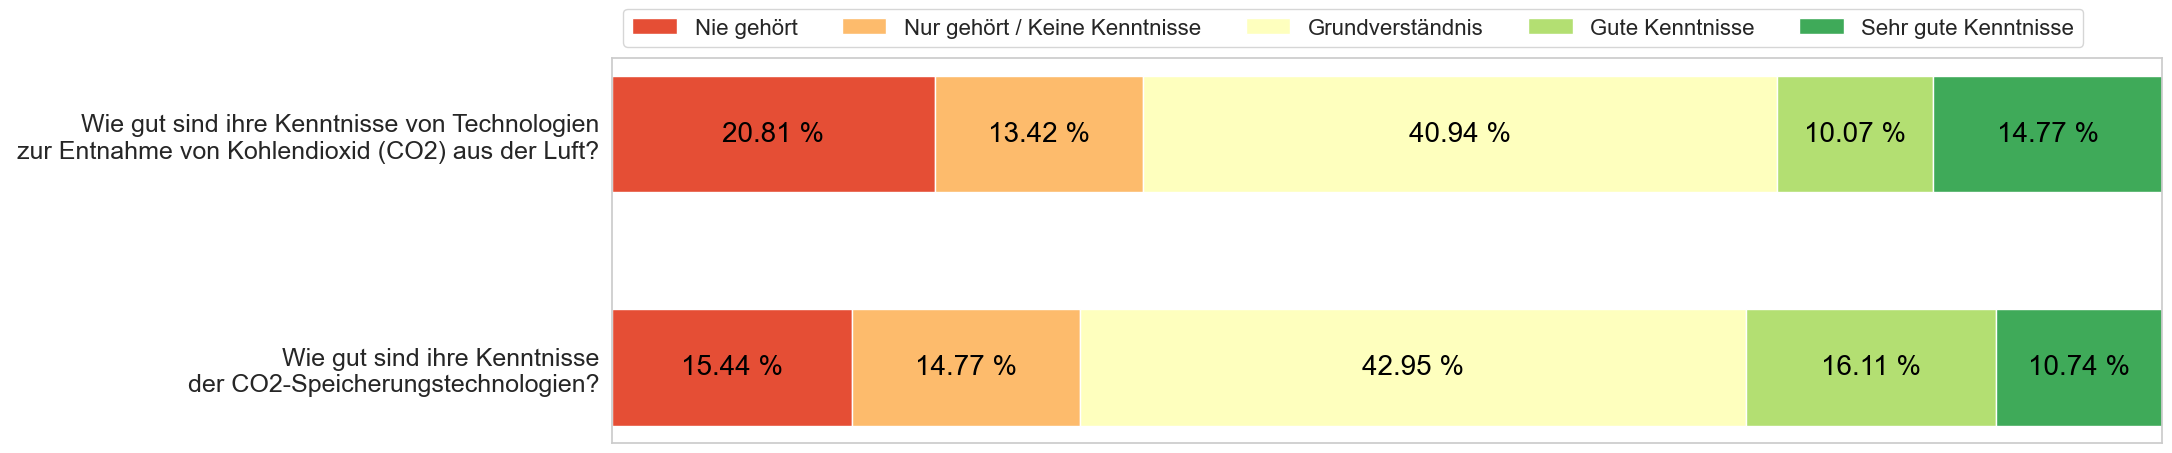

In [126]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.size'] = 12

def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap("RdYlGn")(np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(20, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5, label=colname, color=color, )
        ax.legend(loc='best', fontsize=24)
        #ax.set_xlabel(colname, fontsize = 20) 
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = "black" #"white" if r * g * b < 0.5 else "darkgrey"
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, "{:3.2f} %".format(c), ha="center", va="center", color=text_color, size=20)
            
    ax.legend(
        ncol=len(category_names),
        bbox_to_anchor=(0, 1),
        loc="lower left",
        fontsize=16#"large",
    )

    ax.set_yticks(np.arange(len(labels)), labels=labels, size=18)
    
    
    return fig, ax


survey(results, category_names)
plt.show()

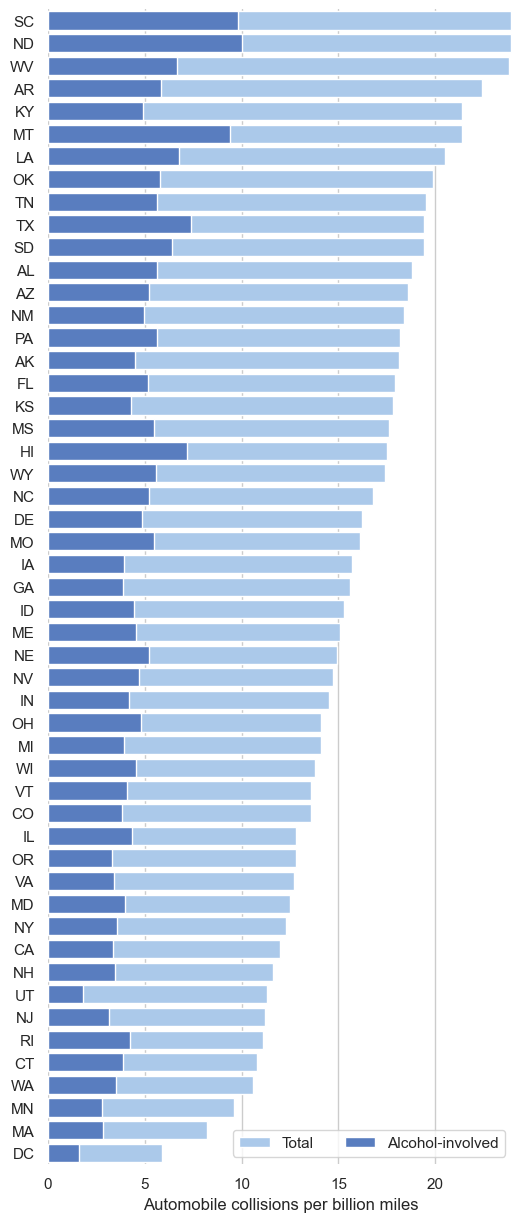

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Load the example car crash dataset
crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="total", y="abbrev", data=crashes, label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="alcohol", y="abbrev", data=crashes, label="Alcohol-involved", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="", xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)

In [36]:
results

{'Wie gut sind ihre Kenntnisse dieser Technologien?': [0.2080536912751678,
  0.1342281879194631,
  0.40939597315436244,
  0.10067114093959731,
  0.1476510067114094],
 'Wie gut sind ihre Kenntnisse der CO2-Speicherungstechnologien?': [0.15436241610738255,
  0.1476510067114094,
  0.42953020134228187,
  0.1610738255033557,
  0.10738255033557047]}

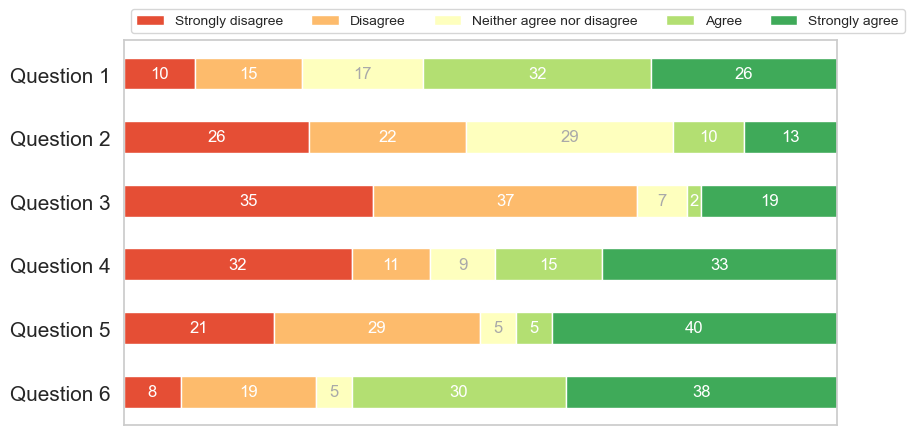

In [108]:
import matplotlib.pyplot as plt
import numpy as np

category_names = [
    "Strongly disagree",
    "Disagree",
    "Neither agree nor disagree",
    "Agree",
    "Strongly agree",
]
results = {
    "Question 1": [10, 15, 17, 32, 26],
    "Question 2": [26, 22, 29, 10, 13],
    "Question 3": [35, 37, 7, 2, 19],
    "Question 4": [32, 11, 9, 15, 33],
    "Question 5": [21, 29, 5, 5, 40],
    "Question 6": [8, 19, 5, 30, 38],
}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap("RdYlGn")(np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5, label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = "white" if r * g * b < 0.5 else "darkgrey"
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha="center", va="center", color=text_color)
    ax.legend(
        ncol=len(category_names),
        bbox_to_anchor=(0, 1),
        loc="lower left",
        fontsize="small",
    )


    ax.set_yticks(np.arange(len(labels)), labels=labels, size=15)
    
    return fig, ax


survey(results, category_names)
plt.show()

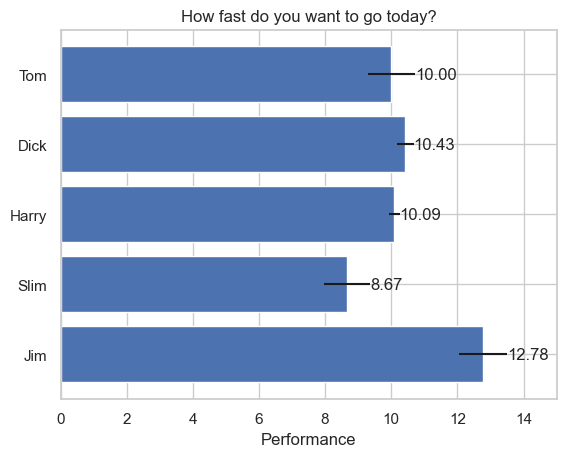

In [100]:
# Fixing random state for reproducibility
np.random.seed(19680801)

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

fig, ax = plt.subplots()

hbars = ax.barh(y_pos, performance, xerr=error, align='center')
ax.set_yticks(y_pos, labels=people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

# Label with specially formatted floats
ax.bar_label(hbars, fmt='%.2f')
ax.set_xlim(right=15)  # adjust xlim to fit labels

plt.show()